# Dataset Details:

- The dataset is named World_development_measurement.
- The dataset has information about important economic and development metrics related to various countries across the globe.
- It contains  2976  rows and 25 columns.

## Columns included:

**Birth Rate :**  Proportion of live births, stored as a decimal (e.g., 0.02 = 2%).

**Business Tax Rate :**  Business tax rate (string with “%”), needs conversion to numeric.

**CO2 Emissions :**  Total national carbon dioxide emissions (numeric).

**Country :**  Name of the country.

**Days to Start Business :**  Average days required to legally start a business.

**Ease of Business :**  Ease of Doing Business ranking (lower = better).

**Energy Usage -**  Total national energy consumption.

**GDP :**  Gross Domestic Product in USD (stored as string with $ and commas).

**Health Exp % GDP :**  Health expenditure as proportion of GDP (decimal, e.g., 0.035 = 3.5%).

**Health Exp/Capita :**  Per capita health expenditure in USD (stored as string with $).

**Hours to do Tax :**  Annual hours required for tax compliance.

**Infant Mortality Rate :**  Infant deaths as a proportion (decimal format).

**Internet Usage :**  Proportion of population using the Internet (decimal, 0–1).

**Lending Interest :**  Average lending interest rate (%).

**Life Expectancy Female :**  Average female life expectancy (years).

**Life Expectancy Male :**  Average male life expectancy (years).

**Mobile Phone Usage :**  Proportion of population using mobile phones (decimal, 0–1).

**Number of Records :**  Constant field (value = 1 for all rows, not useful for analysis).

**Population 0-14 :**  Proportion of population aged 0–14 years (decimal).

**Population 15-64 :**  Proportion of population aged 15–64 years (decimal).

**Population 65+ :**  Proportion of population aged 65+ years (decimal).

**Population Total :**  Total population of the country.

**Population Urban :**  Proportion of population living in urban areas (decimal).

**Tourism Inbound :**  Revenue from inbound tourism (stored as string in USD).

**Tourism Outbound :**  Expenditure on outbound tourism (stored as string in USD).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_df= pd.read_excel("C:/Users/soumy/Desktop/New folder/global-development-clustering/data/raw/World_development_mesurement.xlsx")

In [3]:
df= raw_df.copy() # preserving the original dataset

# Data Exploration

In [4]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [5]:
df.shape

(2704, 25)

In [6]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [8]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

<Axes: >

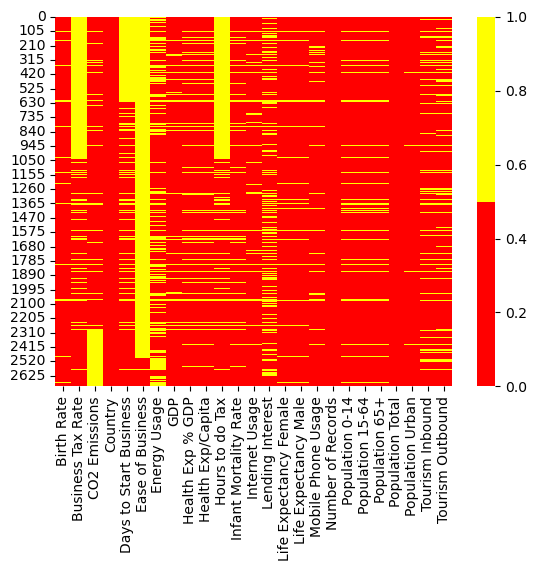

In [9]:
# visualizing null values

cols = df.columns                               
colours = ['red','yellow']                        # red represents non-null value, yellow represents null value
sns.heatmap(df[cols].isnull(),cmap=colours)

In [10]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [11]:
# Checking the number of unique values of each column
df.nunique()

Birth Rate                  47
Business Tax Rate          447
CO2 Emissions             1743
Country                    208
Days to Start Business     126
Ease of Business           185
Energy Usage              1721
GDP                       2494
Health Exp % GDP           145
Health Exp/Capita         1069
Hours to do Tax            280
Infant Mortality Rate      129
Internet Usage              11
Lending Interest           351
Life Expectancy Female      49
Life Expectancy Male        47
Mobile Phone Usage          26
Number of Records            1
Population 0-14            376
Population 15-64           298
Population 65+             208
Population Total          2699
Population Urban           822
Tourism Inbound           1650
Tourism Outbound          1457
dtype: int64

In [12]:
# identifying numerical and categorical columns

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")


We have 19 numerical features: ['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'Ease of Business', 'Energy Usage', 'Health Exp % GDP', 'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Number of Records', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban']

We have 6 categorical features: ['Business Tax Rate', 'Country', 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']


In [13]:
#Checking Datatypes
df.dtypes

Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound            object
Tourism Outbound           object
dtype: object

In [14]:
# printing first 10 items of each categorical column
categorical_features= ['Business Tax Rate', 'Country', 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound'] 

for col in categorical_features:
    print(f"{col} : {df[col].unique()[:10]}")
    print('\n')

Business Tax Rate : [nan '76.9%' '52.1%' '75.7%' '17.1%' '47.5%' '279.7%' '50.6%' '65.7%'
 '74.0%']


Country : ['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros']


GDP : ['$54,790,058,957' '$9,129,594,819' '$2,359,122,303' '$5,788,311,645'
 '$2,610,959,139' '$870,486,066' '$9,287,367,569' '$914,500,332'
 '$1,385,058,212' '$201,899,884']


Health Exp/Capita : ['$60' '$22' '$15' '$152' '$12' '$7' '$26' '$11' '$10' '$13']


Tourism Inbound : ['$102,000,000' '$34,000,000' '$77,000,000' '$227,000,000' '$23,000,000'
 '$1,400,000' '$132,000,000' '$5,000,000' '$14,000,000' '$15,000,000']


Tourism Outbound : ['$193,000,000' '$146,000,000' '$50,000,000' '$209,000,000' '$30,000,000'
 '$14,000,000' '$241,000,000' '$33,000,000' '$56,000,000' nan]




In [15]:
#Removing unwanted Characters.
df['Business Tax Rate'] = df['Business Tax Rate'].str.replace('%','')

df['GDP'] = df['GDP'].str.replace('$','')
df['GDP'] = df['GDP'].str.replace(',','')

df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace('$','')
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace(',','')

df['Tourism Inbound'] = df['Tourism Inbound'].str.replace('$','')
df['Tourism Inbound'] = df['Tourism Inbound'].str.replace(',','')

df['Tourism Outbound'] = df['Tourism Outbound'].str.replace('$','')
df['Tourism Outbound'] = df['Tourism Outbound'].str.replace(',','')


In [16]:
df.head(20)

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,54790058957,0.035,60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,102000000,193000000
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,9129594819,0.034,22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,34000000,146000000
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,2359122303,0.043,15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,77000000,50000000
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,5788311645,0.047,152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,227000000,209000000
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,2610959139,0.051,12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,23000000,30000000
5,0.042,NaN,301.0,Burundi,NaN,NaN,NaN,870486066,0.063,7,...,47.0,0.0,1,0.490,0.481,0.029,6674286,0.082,1400000,14000000
6,0.041,NaN,3432.0,Cameroon,NaN,NaN,6310.0,9287367569,0.044,26,...,51.0,0.0,1,0.453,0.513,0.034,15927713,0.455,132000000,241000000
7,0.039,NaN,268.0,Central African Republic,NaN,NaN,NaN,914500332,0.043,11,...,42.0,0.0,1,0.423,0.537,0.040,3638316,0.376,5000000,33000000
8,0.051,NaN,176.0,Chad,NaN,NaN,NaN,1385058212,0.063,10,...,46.0,0.0,1,0.490,0.482,0.028,8301151,0.216,14000000,56000000
9,0.039,NaN,84.0,Comoros,NaN,NaN,NaN,201899884,0.035,13,...,56.0,NaN,1,0.415,0.554,0.031,528312,0.281,15000000,NaN


In [17]:
df.dtypes

Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound            object
Tourism Outbound           object
dtype: object

In [18]:
#Changing the dtypes. of categorical features
df['Business Tax Rate'] = df['Business Tax Rate'].astype('float64')
df['GDP'] = df['GDP'].astype('float64')
df['Health Exp/Capita']= df['Health Exp/Capita'].astype('float64')
df['Tourism Inbound'] = df['Tourism Inbound'].astype('float64')
df['Tourism Outbound'] = df['Tourism Outbound'].astype('float64')



In [19]:
# verifying
df.dtypes

Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

In [20]:
# check for missing value count
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [21]:
# Checking percentage of Missing Values
df.isnull().mean().sort_values(ascending=True)*100

Population Total           0.000000
Country                    0.000000
Number of Records          0.000000
Population Urban           0.961538
Birth Rate                 4.400888
Life Expectancy Male       5.029586
Life Expectancy Female     5.029586
Mobile Phone Usage         6.176036
Internet Usage             6.397929
GDP                        7.766272
Population 0-14            8.136095
Population 15-64           8.136095
Population 65+             8.136095
Infant Mortality Rate      9.615385
Health Exp/Capita         11.427515
Health Exp % GDP          11.427515
Tourism Inbound           13.609467
Tourism Outbound          17.418639
CO2 Emissions             21.412722
Lending Interest          30.473373
Energy Usage              33.986686
Days to Start Business    36.464497
Business Tax Rate         47.374260
Hours to do Tax           47.633136
Ease of Business          93.158284
dtype: float64

In [22]:
# Duplicates
print('Duplicates:', df.duplicated().sum())

Duplicates: 0


In [23]:
countries = df['Country']   # keeping this for later mapping clusters to country names


In [24]:
# Drop 'Country' and 'Number of Records' from the working dataset
df = df.drop(['Country', 'Number of Records'], axis=1) 


In [25]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound'],
      dtype='object')

# Check distributions

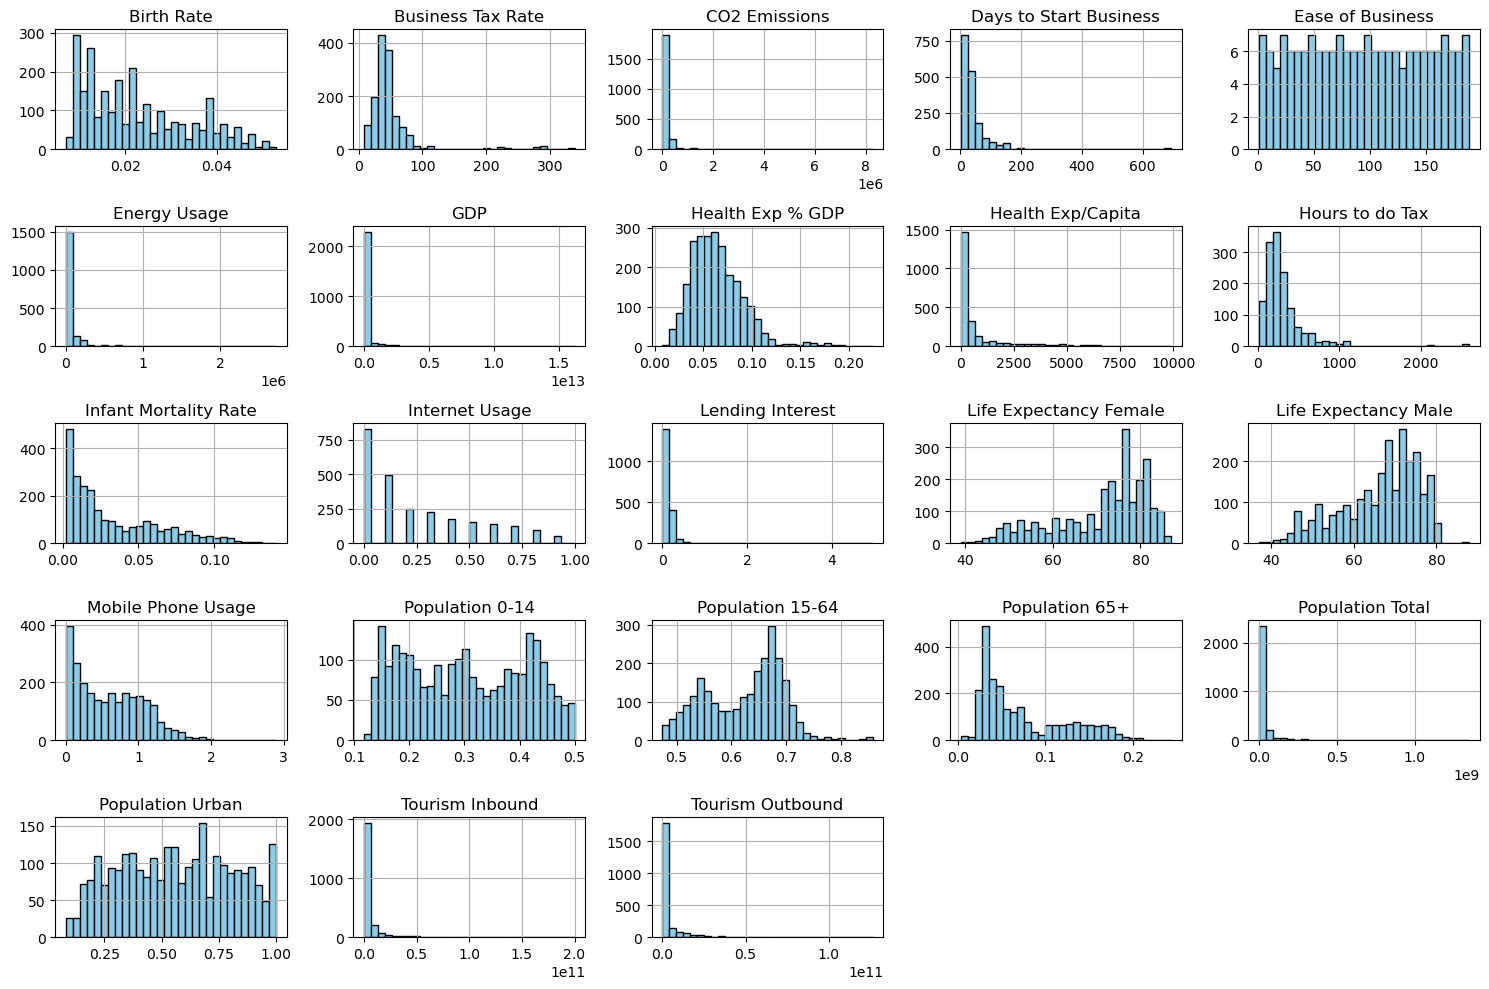

In [26]:
# Histograms for numerical features

df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

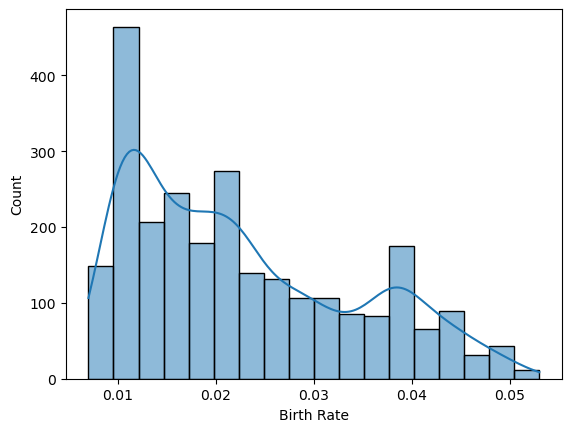

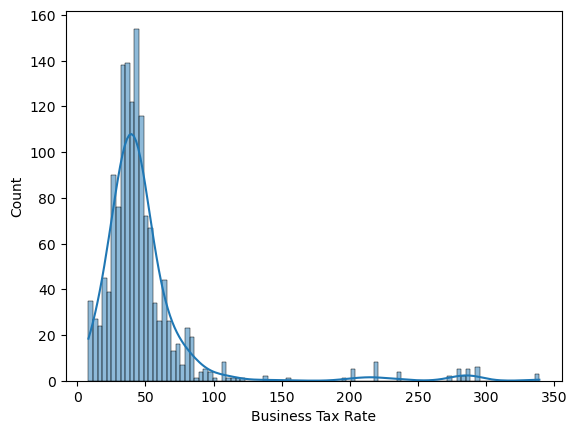

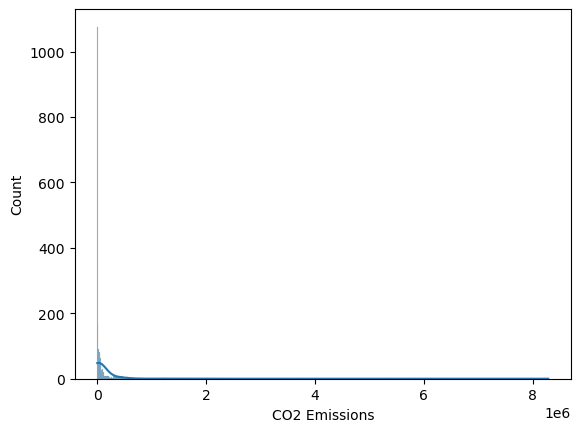

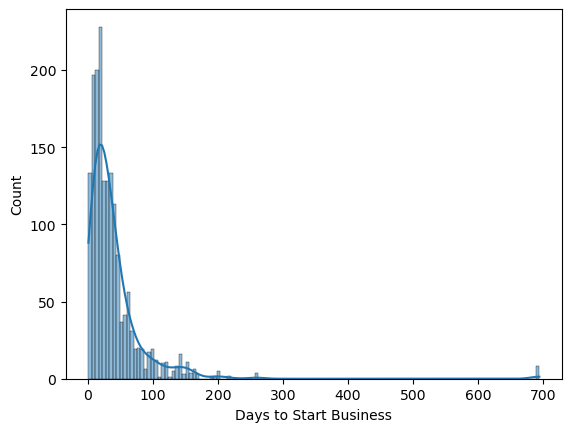

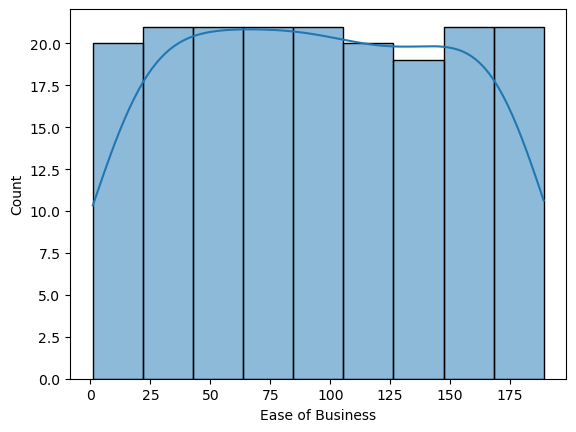

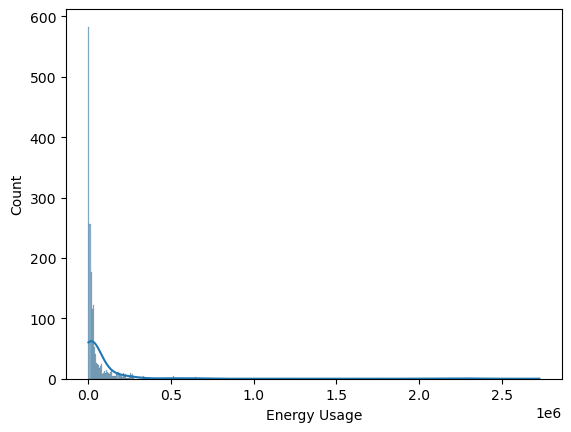

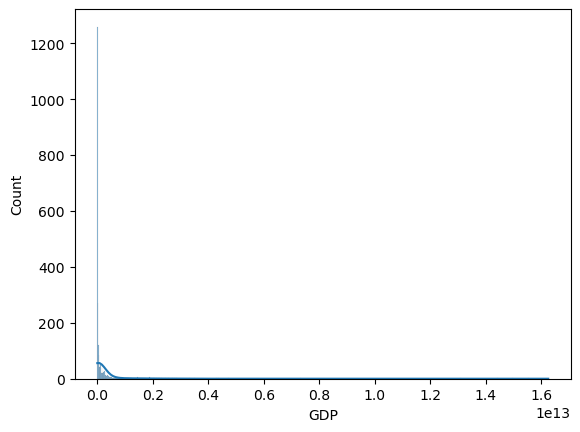

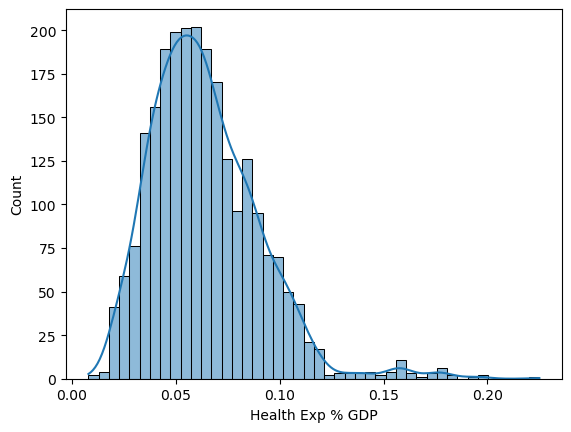

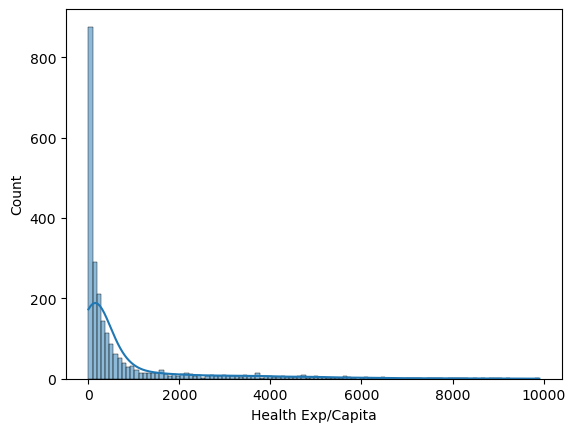

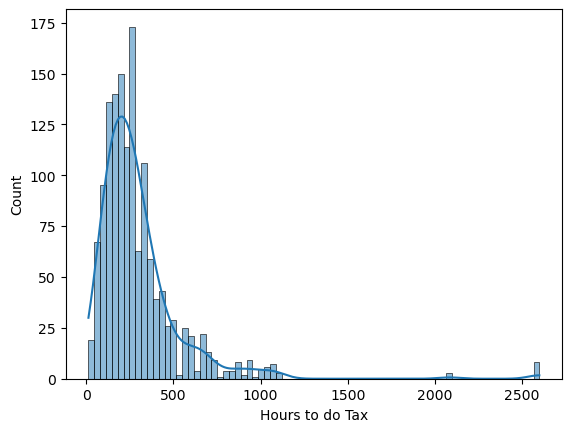

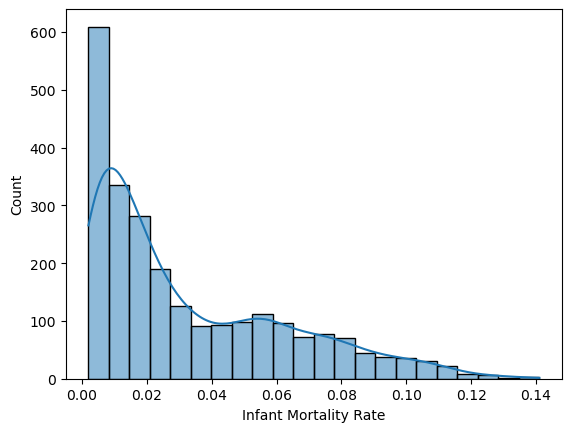

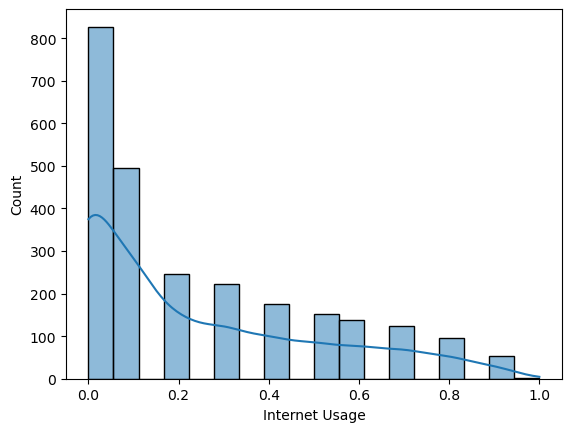

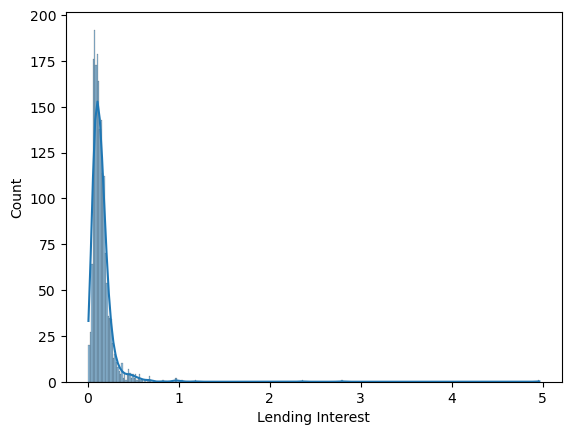

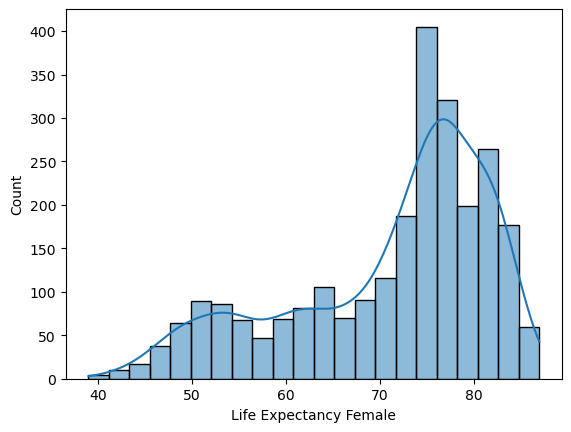

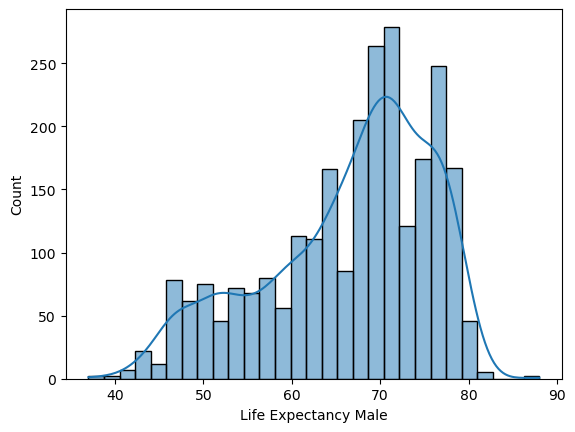

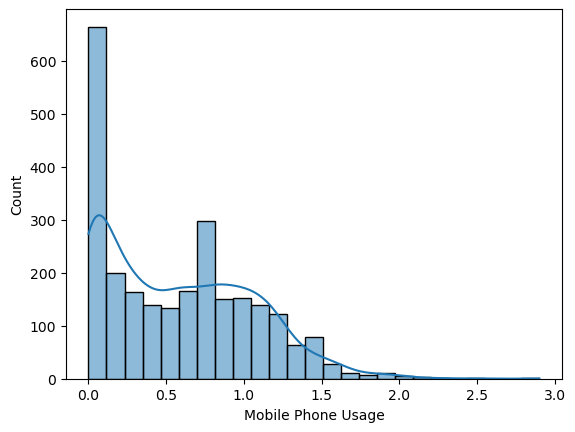

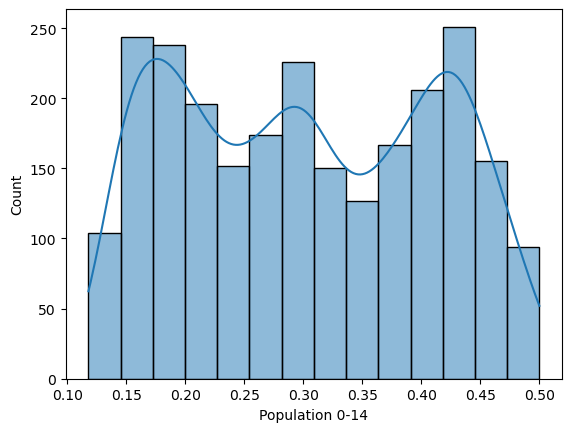

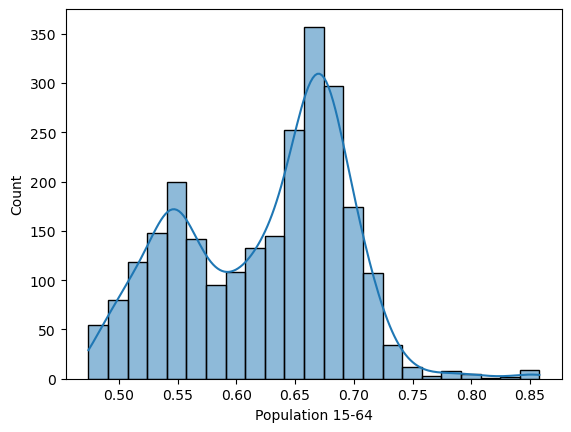

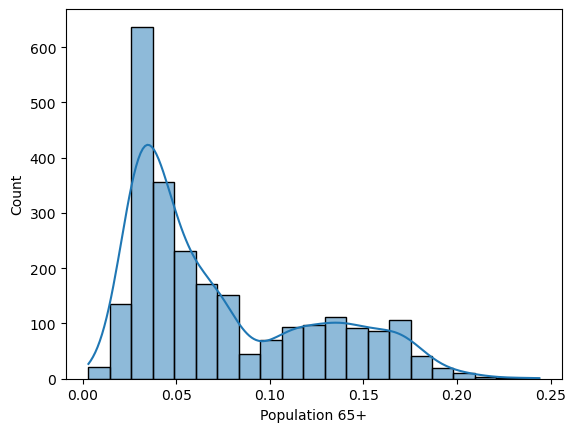

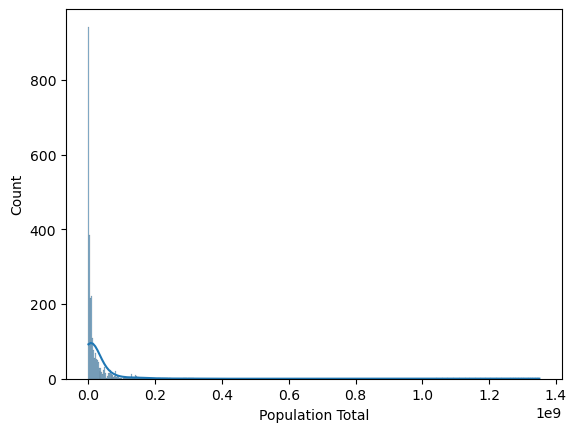

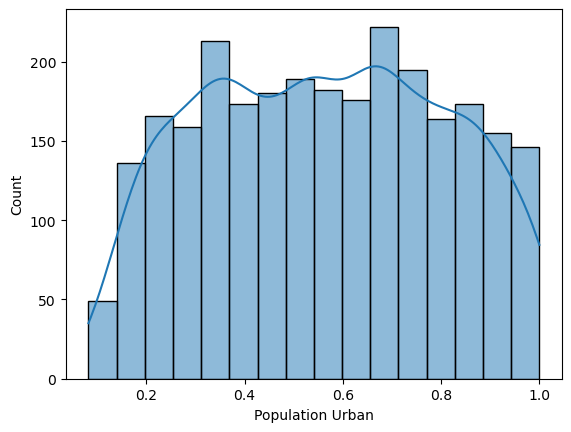

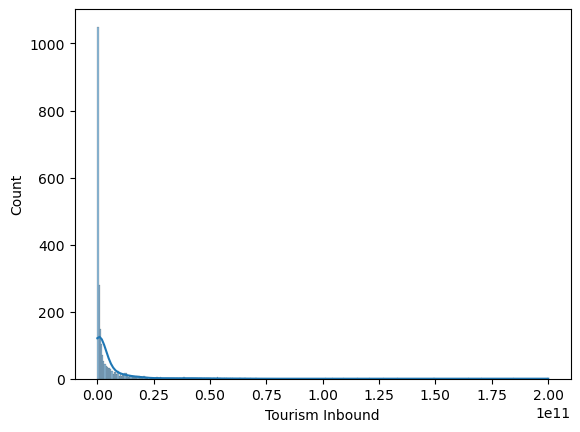

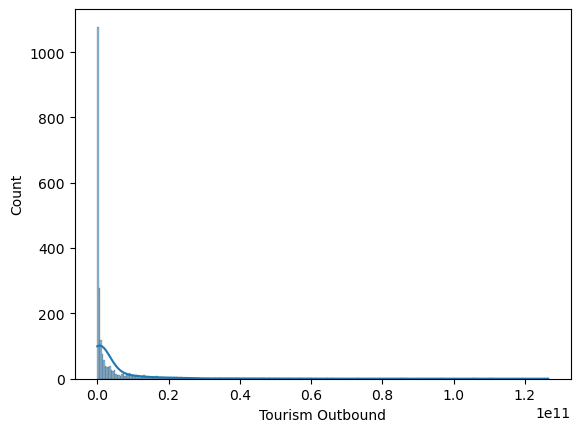

In [27]:
# distribution plots

numerical_cols = df.select_dtypes(include=['int64','float64'])

for col in numerical_cols:
    sns.histplot(df[col],kde=True)
    plt.show()

In [28]:
# Checking for skewness
df.skew().sort_values(ascending=True)

Life Expectancy Female    -0.891556
Life Expectancy Male      -0.705485
Population 15-64          -0.186881
Population Urban           0.012519
Ease of Business           0.017745
Population 0-14            0.059660
Mobile Phone Usage         0.569605
Birth Rate                 0.662151
Population 65+             0.919841
Internet Usage             0.940966
Infant Mortality Rate      1.049118
Health Exp % GDP           1.179757
Health Exp/Capita          2.817482
Business Tax Rate          4.342568
Hours to do Tax            4.491308
Tourism Outbound           5.210304
Energy Usage               7.062230
Tourism Inbound            7.114871
Days to Start Business     7.437592
CO2 Emissions              8.654039
Population Total           8.788164
GDP                        9.424247
Lending Interest          15.536119
dtype: float64

In [29]:
#Checking for Kurtosis
df.kurtosis().sort_values(ascending=True)

Population 0-14            -1.296264
Ease of Business           -1.200553
Population Urban           -1.081262
Birth Rate                 -0.683573
Population 15-64           -0.593840
Population 65+             -0.393444
Life Expectancy Male       -0.355802
Mobile Phone Usage         -0.314409
Internet Usage             -0.272387
Life Expectancy Female     -0.247267
Infant Mortality Rate       0.172241
Health Exp % GDP            2.963232
Health Exp/Capita           8.399443
Business Tax Rate          21.826602
Hours to do Tax            30.792323
Tourism Outbound           31.853473
Energy Usage               54.890569
Tourism Inbound            69.226232
Days to Start Business     77.661930
Population Total           82.383028
CO2 Emissions              83.080721
GDP                       105.532785
Lending Interest          374.122539
dtype: float64

# Data Preprocessing

### handling missing values

In [30]:
# dropping columns with more than 40% missing values
df = df.drop(['Business Tax Rate','Hours to do Tax','Ease of Business'],axis=1)

In [31]:
df.columns

Index(['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'Energy Usage',
       'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
       'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban', 'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [32]:
# imputing other columns with median because the data are skewed
df = df.fillna(df.median(numeric_only=True))


In [33]:
# verifying
df.isnull().sum()

Birth Rate                0
CO2 Emissions             0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

# Feature Engineering

### Log-Transform Skewed Features

In [34]:
# Check skewness
skewed_cols = df.select_dtypes(include=['float64', 'int64']).skew()
skewed_cols = skewed_cols[abs(skewed_cols) > 0.5].index  # threshold for selecting skewned columns
print(skewed_cols)

Index(['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'Energy Usage',
       'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
       'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 65+',
       'Population Total', 'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')


In [35]:
# Apply log-transform to skewed features
for col in skewed_cols:
    df[col] = np.log1p(df[col])

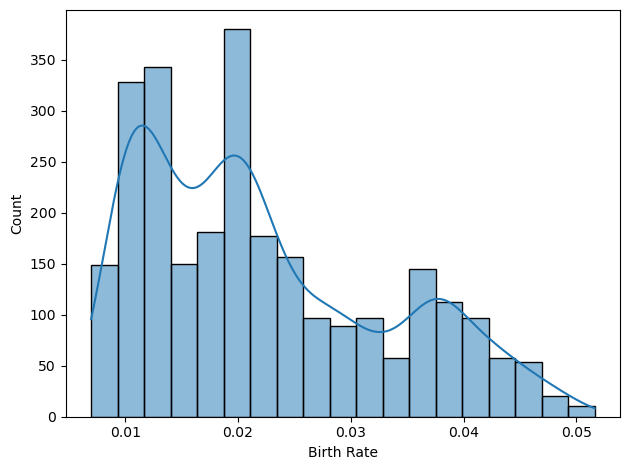

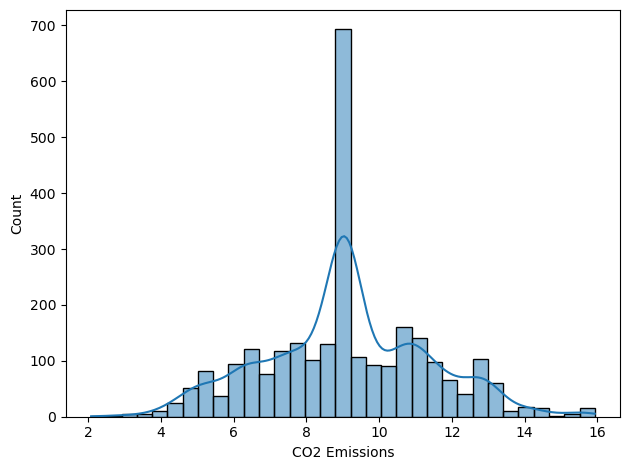

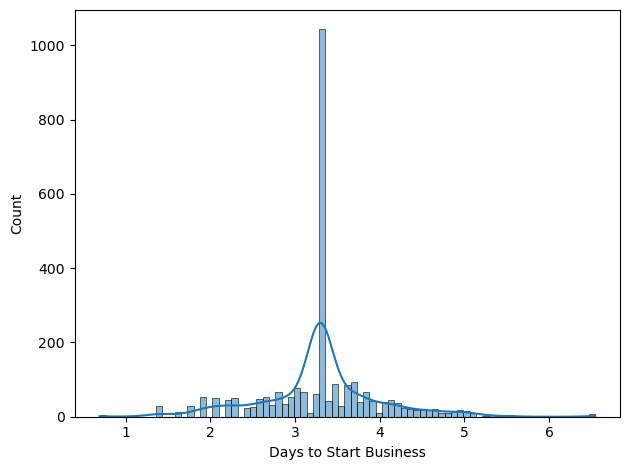

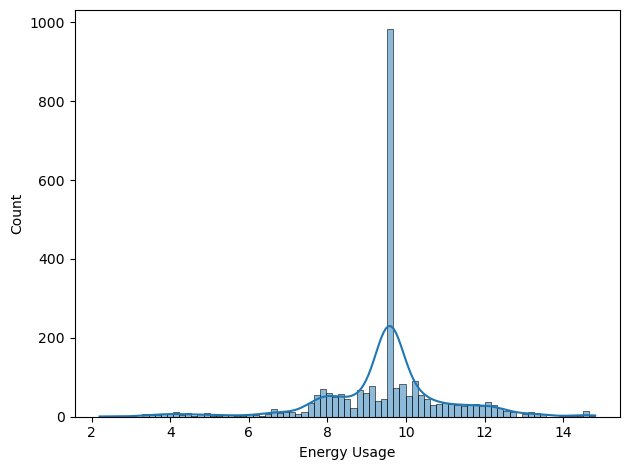

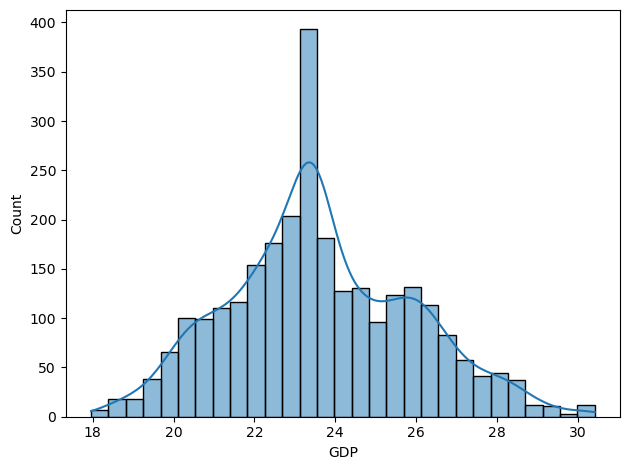

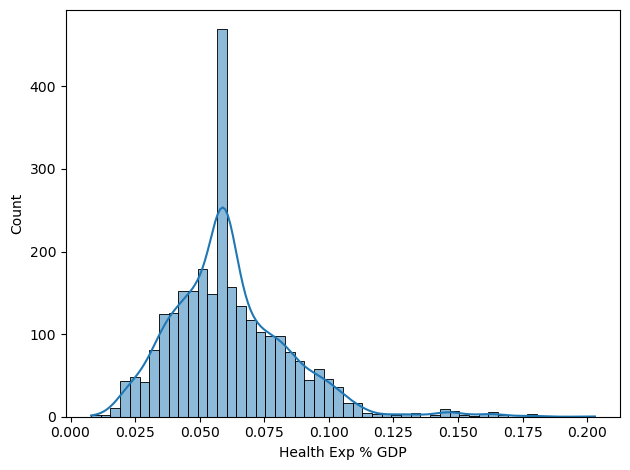

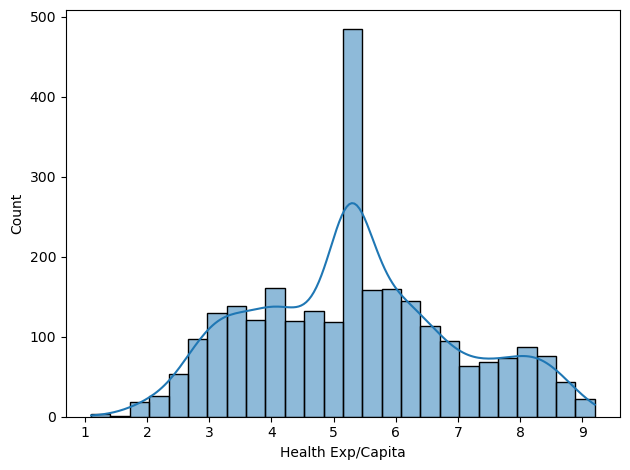

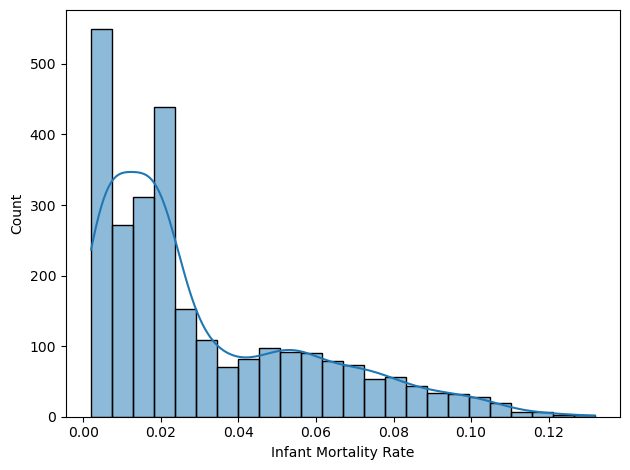

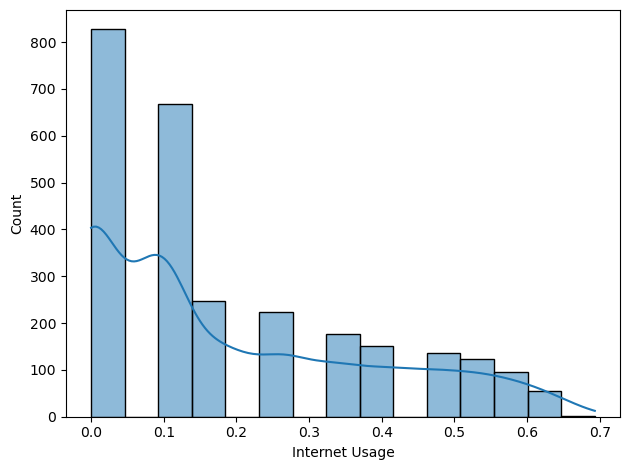

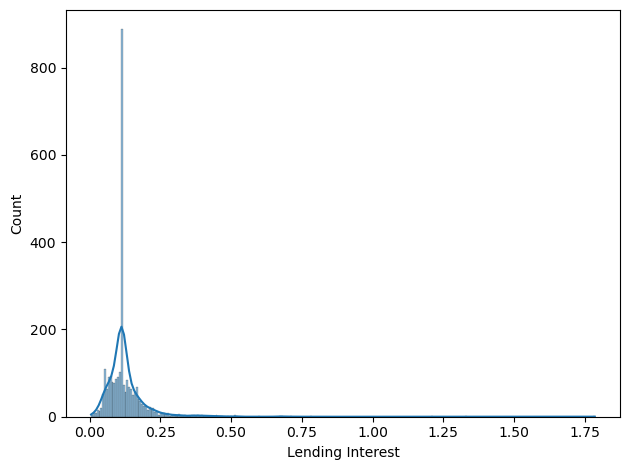

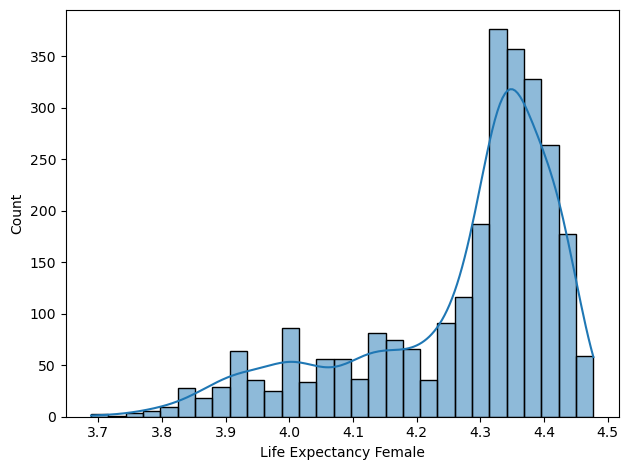

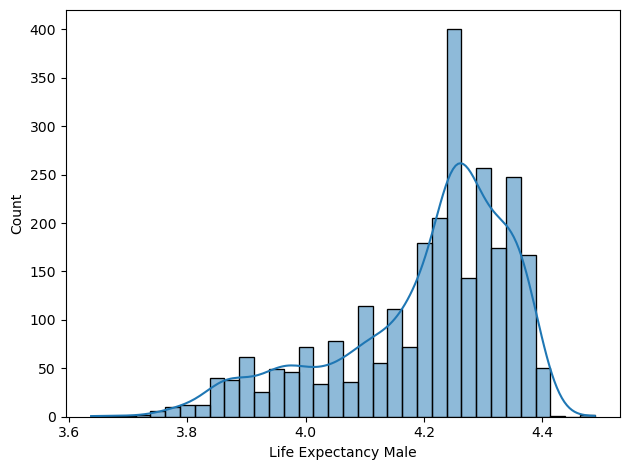

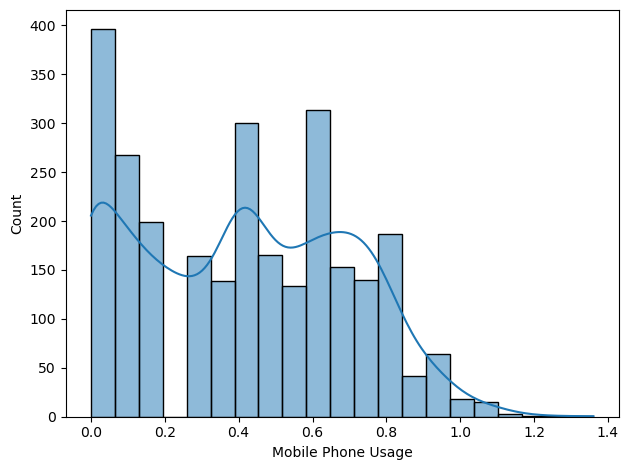

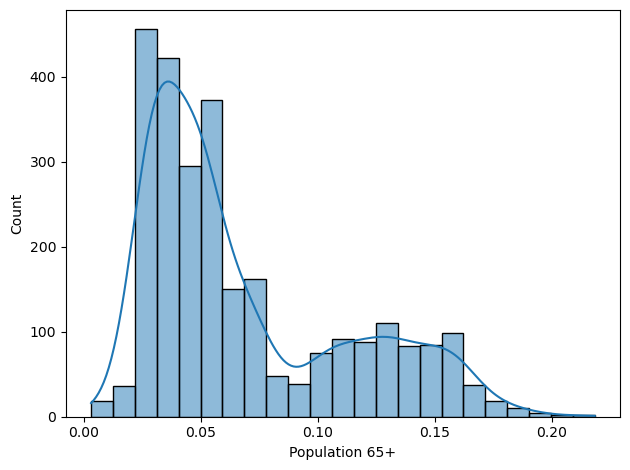

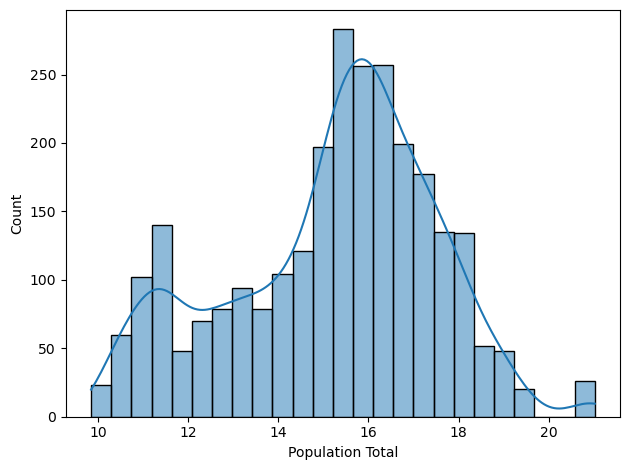

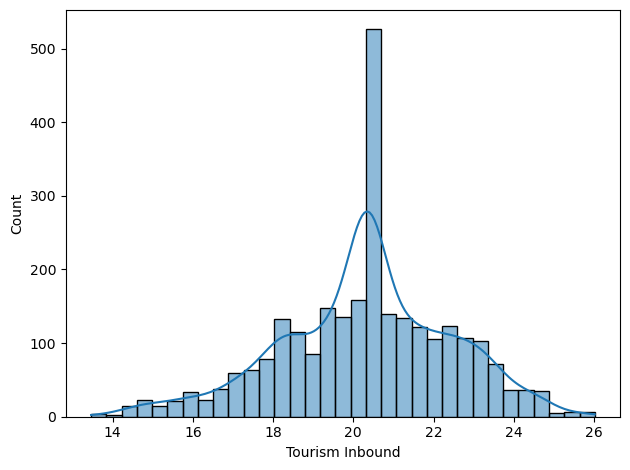

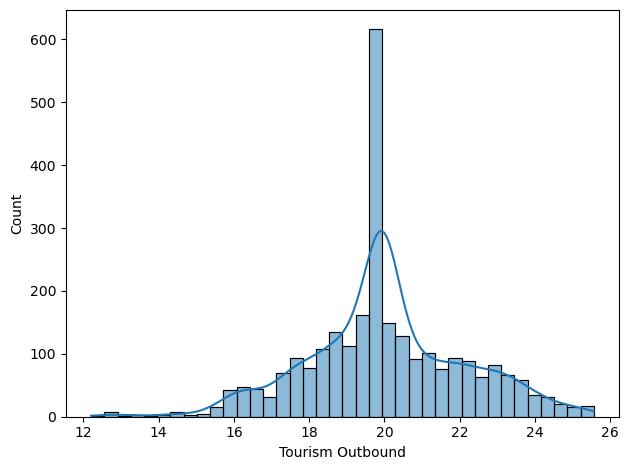

In [36]:
# check histograms after transformation

for col in skewed_cols:
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.show()

In [37]:
# Checking for skewness after log transformation
df.skew().sort_values(ascending=True)

Life Expectancy Female   -1.208874
Life Expectancy Male     -1.037325
Energy Usage             -0.615506
Population Total         -0.371783
Tourism Inbound          -0.273627
Population 15-64         -0.260727
Tourism Outbound         -0.015155
Population Urban          0.012928
Population 0-14           0.070722
CO2 Emissions             0.088705
Mobile Phone Usage        0.130589
Days to Start Business    0.171303
Health Exp/Capita         0.209499
GDP                       0.251343
Birth Rate                0.691082
Internet Usage            0.809393
Population 65+            0.987822
Infant Mortality Rate     1.148650
Health Exp % GDP          1.158712
Lending Interest          6.998601
dtype: float64

Most highly skewed features (Energy Usage, Population Total, Tourism, GDP, CO2 Emissions, Health Exp/Capita, etc.) have drastically reduced skewness after log transformation.

Example:

Energy Usage: 8.72 to -0.61 (now almost symmetric)

GDP: 9.80 to 0.25 (near normal)

Tourism Inbound: 7.63 to -0.27

Mildly skewed features (Birth Rate, Mobile Phone Usage, Internet Usage, Infant Mortality Rate) are now closer to 0–1 range, meaning distributions are more balanced.

Negative skew features (Life Expectancy Male/Female) became slightly more negatively skewed. That’s expected, because log transform doesn’t help much with left-skew.

Lending Interest: reduced(18.57 to 6.99) but still skewed . This variable might have extreme outliers, so we will handle the outliers.

### Outliers detection and Handling

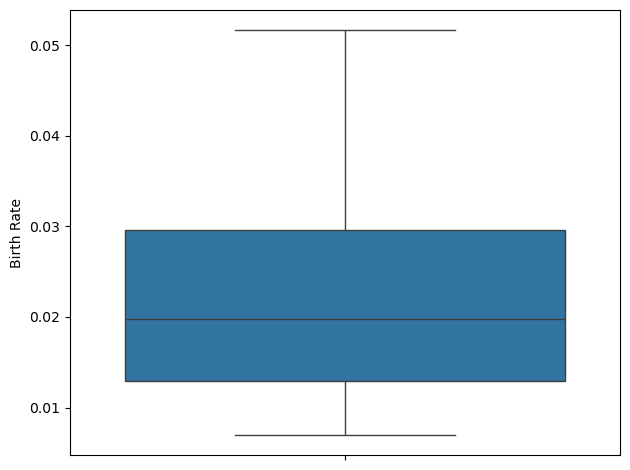

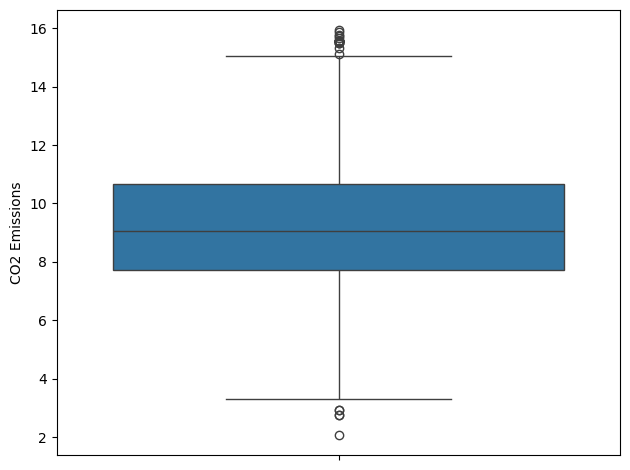

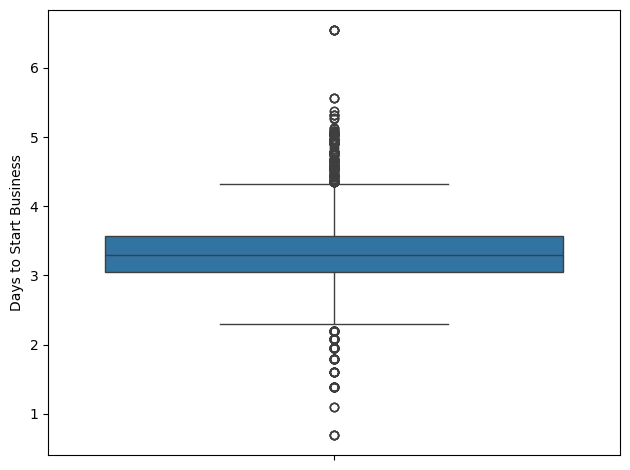

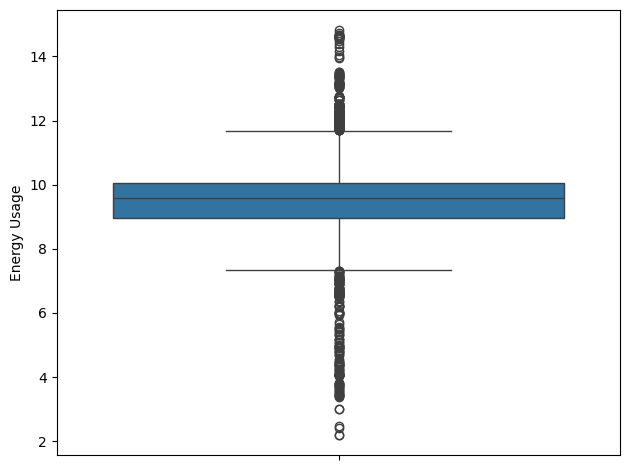

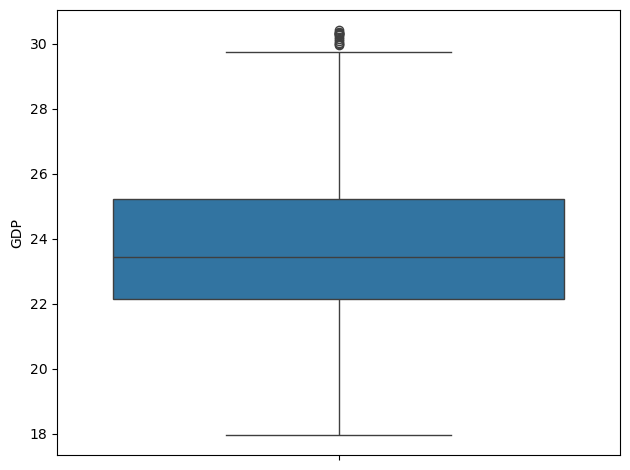

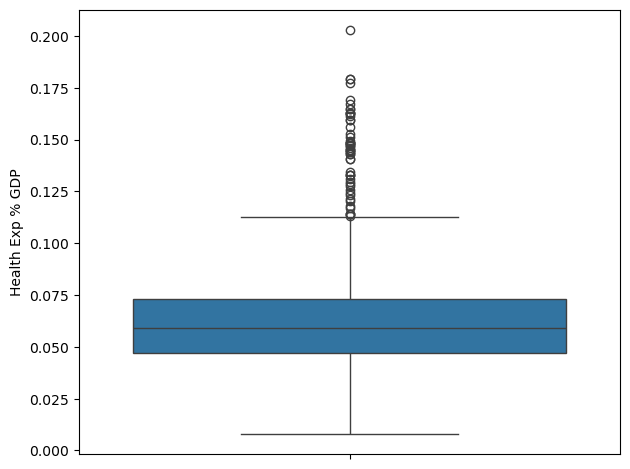

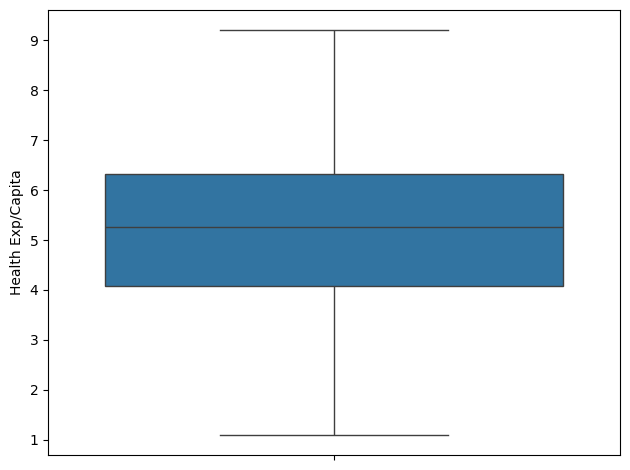

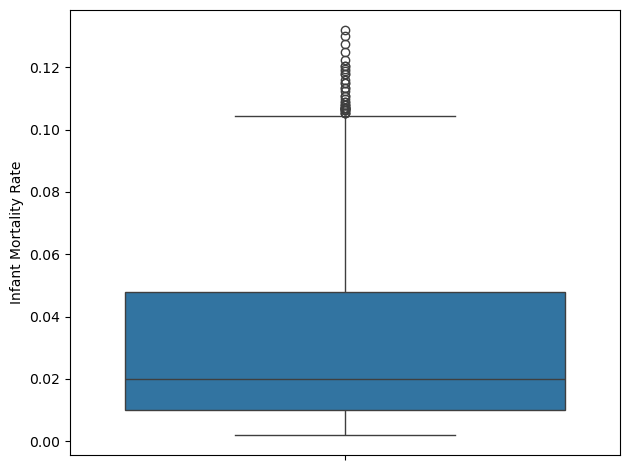

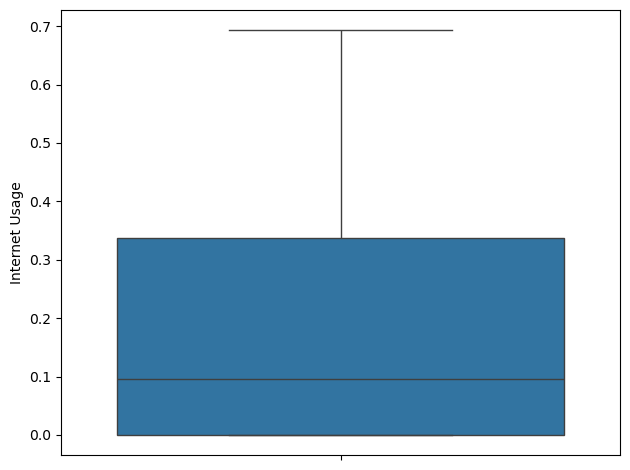

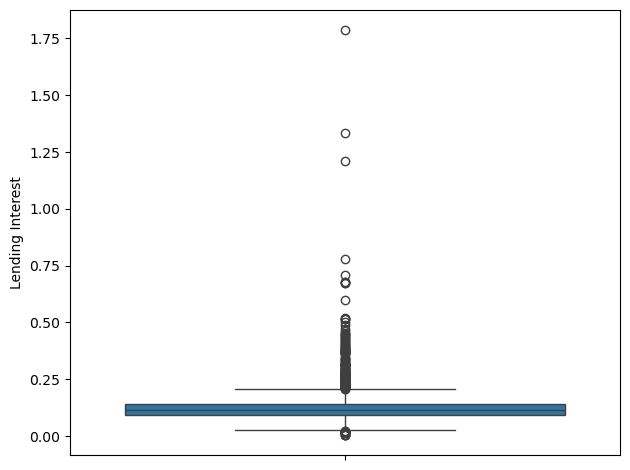

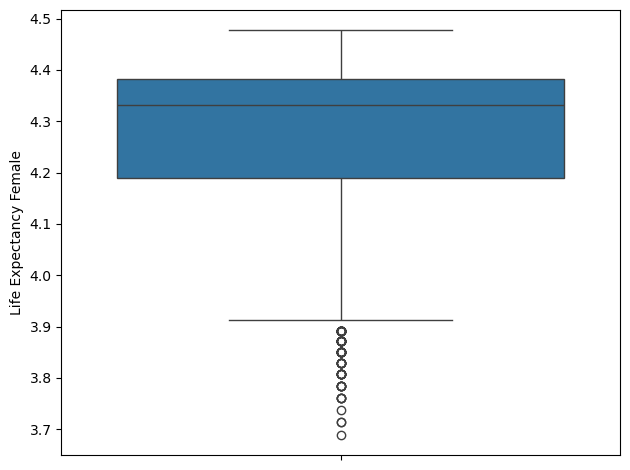

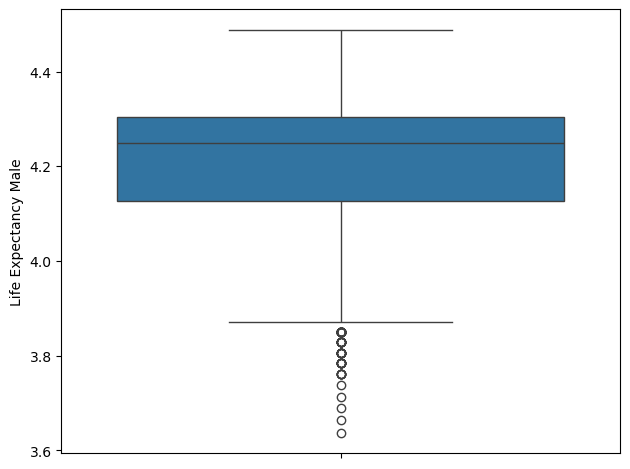

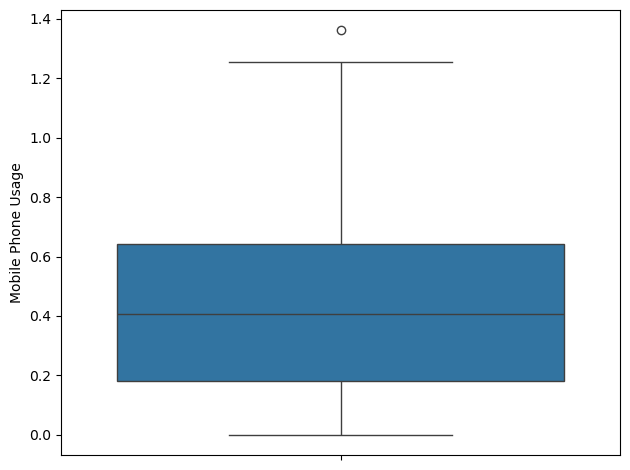

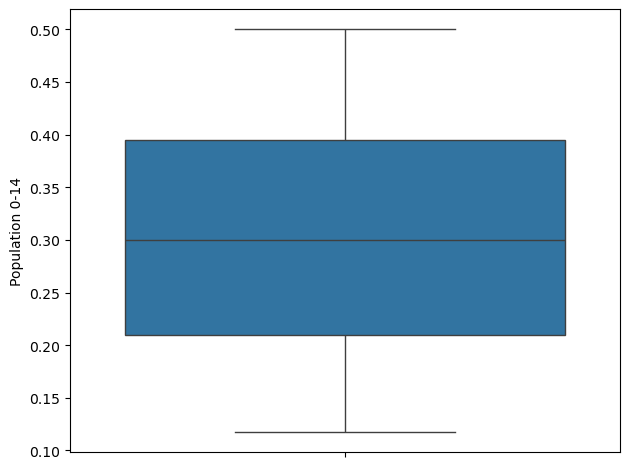

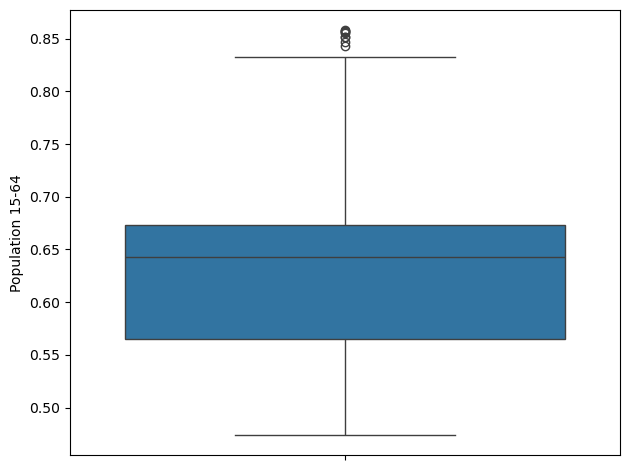

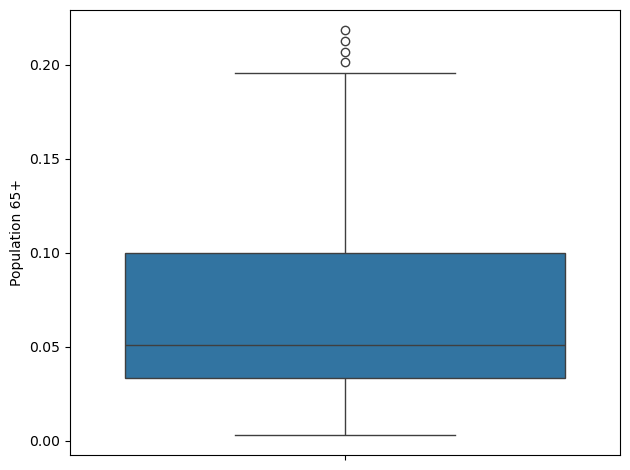

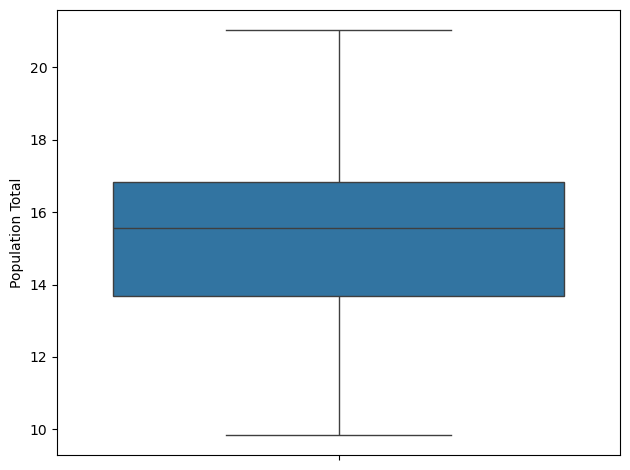

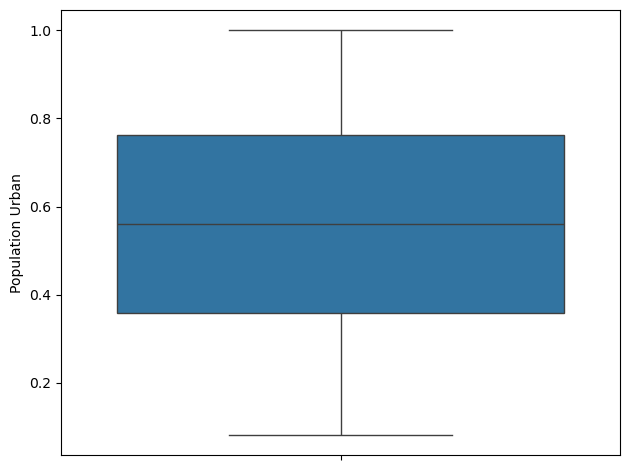

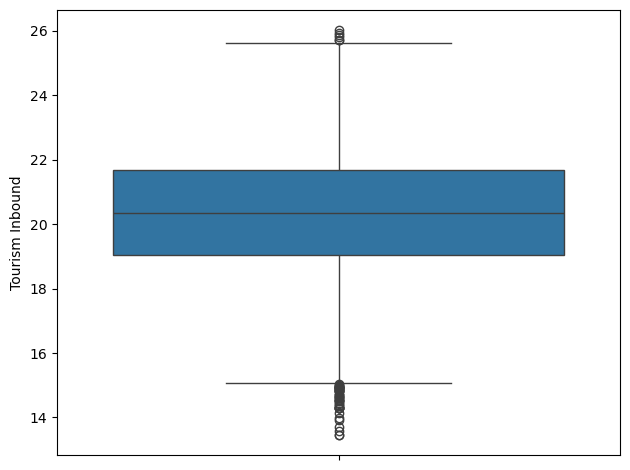

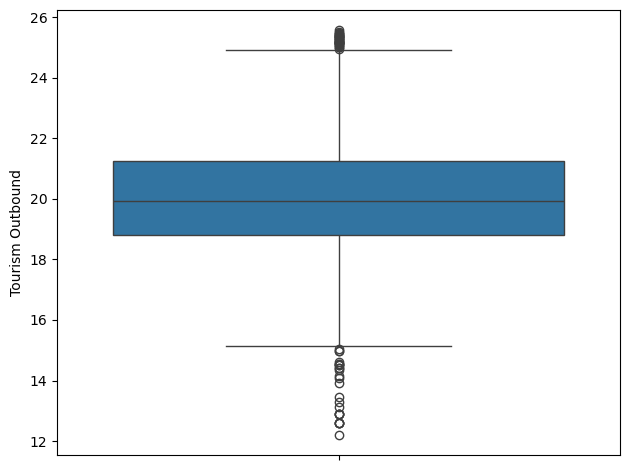

In [38]:
# outlier detection using box plot
numerical_columns = df.select_dtypes(include=['int64','float64'])

for col in numerical_columns:
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()


In [39]:
# handling outlier using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers 
df_capped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

print("Original shape:", df.shape)
print("After capping outliers:", df_capped.shape)

Original shape: (2704, 20)
After capping outliers: (2704, 20)


The shape didn’t change, (2704, 20) remained the same, because capping does not drop rows, it just replaces extreme values beyond the IQR limits with the boundary values.

###### "df_capped" is the new working dataset

### Scaling the features

In [40]:
from sklearn.preprocessing import StandardScaler


In [41]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_capped)


In [42]:
# Convert back to DataFrame with original column names
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


### Checking Correlation among features

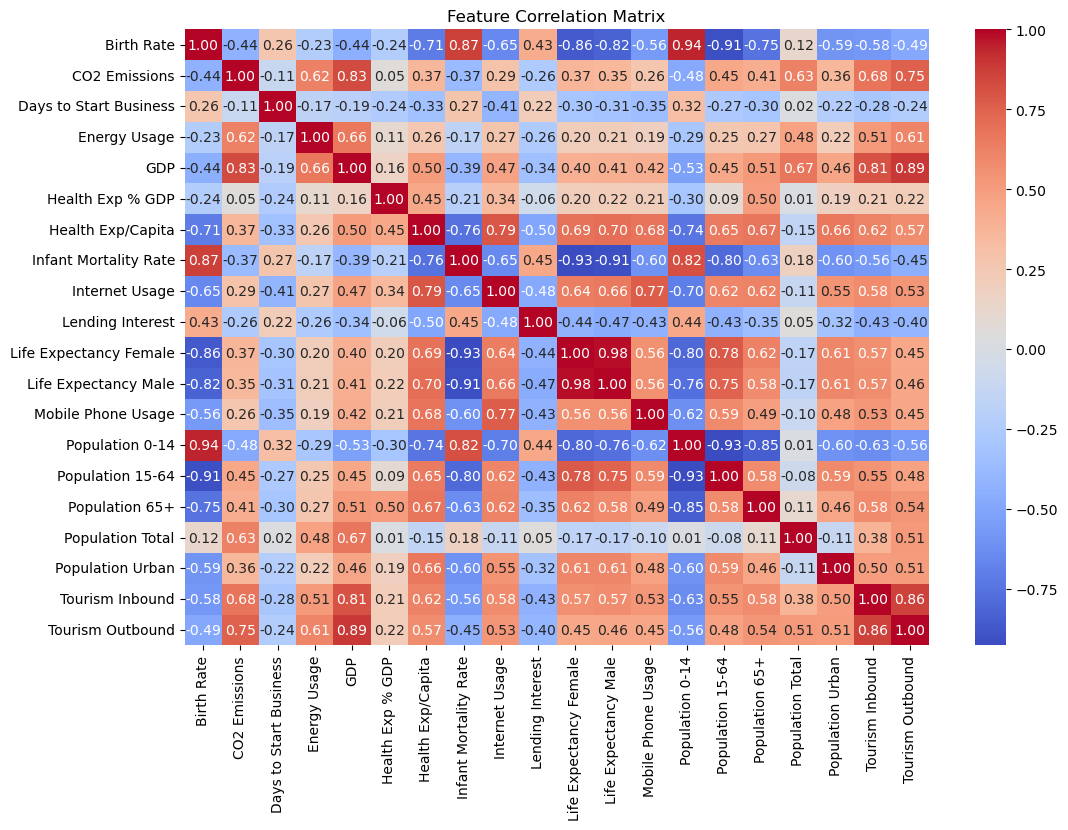

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

### Dimensionality Reduction usin PCA

In [44]:
from sklearn.decomposition import PCA

In [45]:
# Initialize PCA with all components
pca = PCA()
p_components = pca.fit_transform(df_scaled)  

In [46]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.17220062e-01, 1.52397010e-01, 6.49099349e-02, 4.98575854e-02,
       3.83281941e-02, 3.29417913e-02, 2.92371316e-02, 2.40601978e-02,
       2.28024104e-02, 1.39249705e-02, 1.23294524e-02, 1.06770345e-02,
       9.74444851e-03, 7.19118502e-03, 5.10677358e-03, 3.80162831e-03,
       2.62195941e-03, 2.14222082e-03, 6.94114655e-04, 1.18939958e-05])

In [47]:
#comultative explained variance
cumulative_variance= np.round(np.cumsum(explained_variance)*100,1)
cumulative_variance

array([ 51.7,  67. ,  73.5,  78.4,  82.3,  85.6,  88.5,  90.9,  93.2,
        94.6,  95.8,  96.9,  97.8,  98.6,  99.1,  99.5,  99.7,  99.9,
       100. , 100. ])

In [48]:
n_components = np.argmax(cumulative_variance >= 95) + 1
print(f"To retain 95% variance, keep {n_components} components")


To retain 95% variance, keep 11 components


- There are 20 Principal components.
- If we want to keep 95% of the informations then we have to keep first 11 principal components.

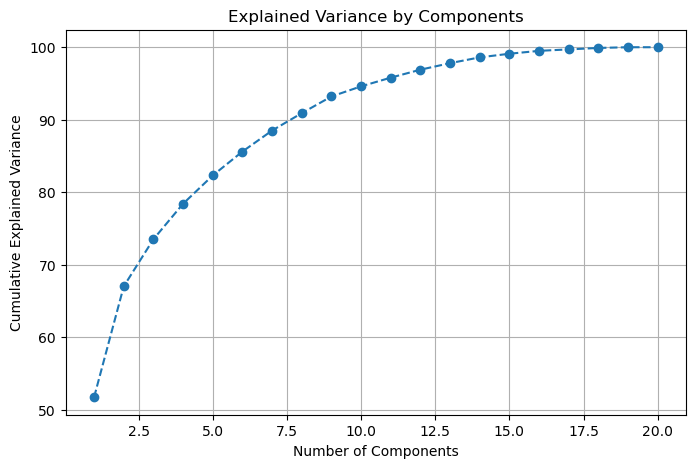

In [49]:
#scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

- Each point shows how much information is retained as more components are added.
- In this graph, an elbow appears to be around 7-10 components, where the curve starts to level off more noticeably after a rapid initial increase.
- After 7-10 components, the curve flattens adding more components gives diminishing returns.
- By the time you reach component 11, we are retaining 95% of the variance.
- To retain 95% information, we will reduce to 11 components.

In [50]:
# Transform the working dataset into the principal components.
pca_95 = PCA(n_components=11)
pca_data_95 = pca_95.fit_transform(df_scaled)

# Model building

## Clustering with original scaled data

### Kmeans

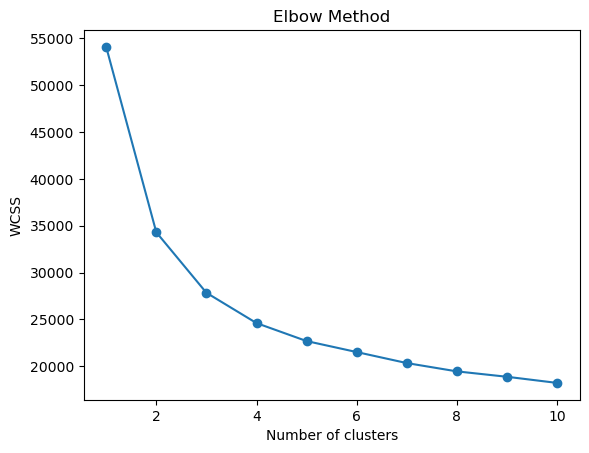

In [51]:
# determining number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



#### K = 2


In [52]:
kmeans_scaled_2 = KMeans(n_clusters=2, random_state=42)
kmeans_scaled_labels_2 = kmeans_scaled_2.fit_predict(df_scaled)   
# df["KMeans_2"] = kmeans_scaled_labels_2 # Add the cluster labels as a new column in the dataframe

print("KMeans with k=2")
print("Silhouette Score:", silhouette_score(df_scaled, kmeans_scaled_labels_2))
print("Davies-Bouldin Index:", davies_bouldin_score(df_scaled, kmeans_scaled_labels_2))


KMeans with k=2
Silhouette Score: 0.30533323329430617
Davies-Bouldin Index: 1.2544123467053407


#### K = 3

In [53]:
kmeans_scaled_3 = KMeans(n_clusters=3, random_state=42)
kmeans_scaled_labels_3 = kmeans_scaled_3.fit_predict(df_scaled)   
# df["KMeans_3"] = kmeans_scaled_labels_3 # Add the cluster labels as a new column in the dataframe

print("KMeans with k=3")
print("Silhouette Score:", silhouette_score(df_scaled, kmeans_scaled_labels_3))
print("Davies-Bouldin Index:", davies_bouldin_score(df_scaled, kmeans_scaled_labels_3))



KMeans with k=3
Silhouette Score: 0.24162177067736124
Davies-Bouldin Index: 1.450381592901745


#### K = 4

In [54]:
kmeans_scaled_4 = KMeans(n_clusters=4, random_state=42)
kmeans_scaled_labels_4 = kmeans_scaled_4.fit_predict(df_scaled)   
# df["KMeans_4"] = kmeans_scaled_labels_4 # Add the cluster labels as a new column in the dataframe

print("KMeans with k=4")
print("Silhouette Score:", silhouette_score(df_scaled, kmeans_scaled_labels_4))
print("Davies-Bouldin Index:", davies_bouldin_score(df_scaled, kmeans_scaled_labels_4))


KMeans with k=4
Silhouette Score: 0.2387821334498916
Davies-Bouldin Index: 1.4709954773027236


In [55]:
#clusters summery
# grp = df.groupby('KMeans_3')
# grp.agg('mean')

### Hierarchial Agglomerative Clustering

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

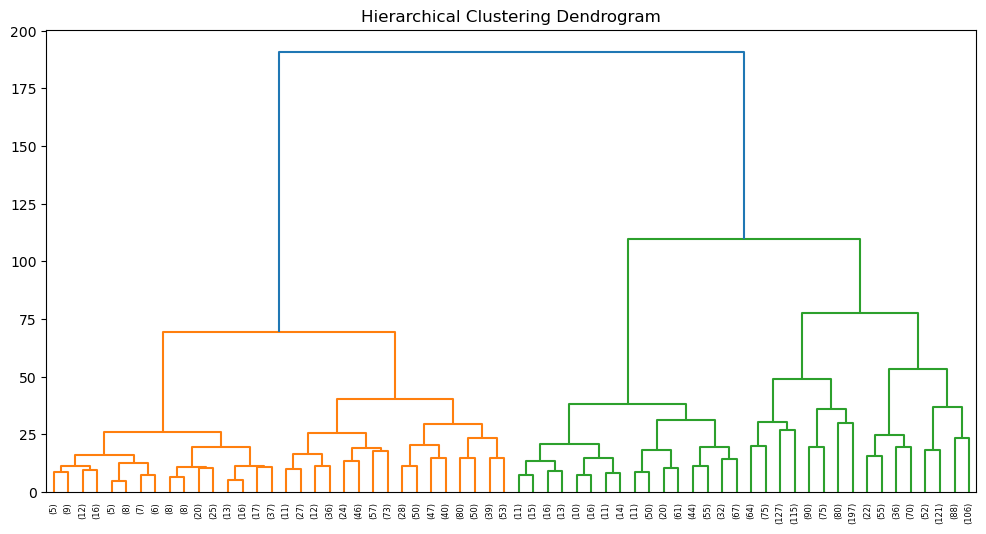

In [56]:
# deciding no. of clusters using dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")

In [57]:
from sklearn.cluster import AgglomerativeClustering

# cluster = 2

agg_2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_agg_2 = agg_2.fit_predict(df_scaled)
# df["HAC_2"] = labels_agg # Add the cluster labels as a new column in the dataframe

print("Silhouette Score:", silhouette_score(df_scaled, labels_agg_2))


Silhouette Score: 0.2933403297038337


In [58]:
# cluster = 3

agg_3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg_3 = agg_3.fit_predict(df_scaled)
# df["HAC_3"] = labels_agg # Add the cluster labels as a new column in the dataframe

print("Silhouette Score:", silhouette_score(df_scaled, labels_agg_3))


Silhouette Score: 0.2134101304284986


In [59]:
# cluster = 4

agg_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_agg_4 = agg_4.fit_predict(df_scaled)
# df["HAC_4"] = labels_agg # Add the cluster labels as a new column in the dataframe

print("Silhouette Score:", silhouette_score(df_scaled, labels_agg_4))


Silhouette Score: 0.1866685018532139


In [60]:
#clusters summery
# grp = df.groupby('HAC_3')
# grp.agg('mean')

### DBSCAN

In [61]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# DBSCAN automatically finds clusters based on density

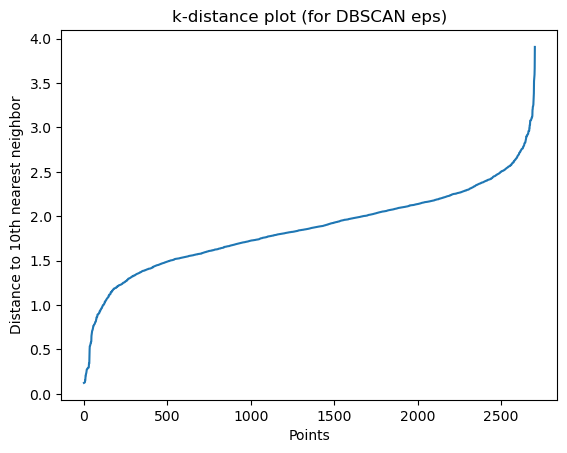

In [62]:
#taking minimum samples as 10
neighbors = NearestNeighbors(n_neighbors = 10)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance plot (for DBSCAN eps)")
plt.xlabel("Points")
plt.ylabel("Distance to 10th nearest neighbor")
plt.show()

In [63]:
# Choosing eps in range of 2 to 4 where the curve sharply bends
for eps in [2.0, 2.5,3.0,3.5,4.0] :
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels= dbscan.fit_predict(df_scaled)
    print("Number of clusters:", len(set(labels)) - (1 if -1 in labels else 0))
    print("Noise points:", list(labels).count(-1))


Number of clusters: 17
Noise points: 437
Number of clusters: 4
Noise points: 42
Number of clusters: 1
Noise points: 3
Number of clusters: 1
Noise points: 0
Number of clusters: 1
Noise points: 0


In [64]:
for eps in [2.0, 2.5, 3.0, 3.5, 4.0]:
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels = dbscan.fit_predict(df_scaled)
    if len(set(labels)) > 1:  # avoid single-cluster case
        score = silhouette_score(df_scaled, labels)
        print(f"eps={eps}, clusters={len(set(labels))- (1 if -1 in labels else 0)}, silhouette={score:.4f}")

eps=2.0, clusters=17, silhouette=-0.2769
eps=2.5, clusters=4, silhouette=-0.0698
eps=3.0, clusters=1, silhouette=0.0852


In [65]:
# final dbscan clustering with eps = 3
dbscan_3 = DBSCAN(eps= 3, min_samples=10)
labels_3 = dbscan_3.fit_predict(df_scaled)

# df["DBSCAN_3"] = labels_3 # Add the cluster labels as a new column in the dataframe


print("Silhouette Score:", silhouette_score(df_scaled, labels_3))


Silhouette Score: 0.08521258612046854


## Clustering with original PCA data


### Kmeans - PCA

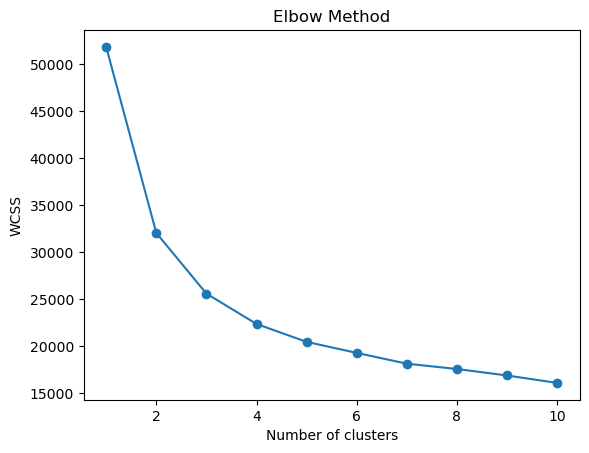

In [66]:
# determining number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data_95)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### K = 2

In [67]:
kmeans_pca_2 = KMeans(n_clusters=2, random_state=42)
kmeans_pca_labels_2 = kmeans_pca_2.fit_predict(pca_data_95)   

print("KMeans_pca with k=2")
print("Silhouette Score:", silhouette_score(pca_data_95, kmeans_pca_labels_2))
print("Davies-Bouldin Index:", davies_bouldin_score(pca_data_95, kmeans_pca_labels_2))


KMeans_pca with k=2
Silhouette Score: 0.3187962867589716
Davies-Bouldin Index: 1.2079498763817123


#### K = 3

In [68]:
kmeans_pca_3 = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels_3 = kmeans_pca_3.fit_predict(pca_data_95)   

print("KMeans_pca with k=3")
print("Silhouette Score:", silhouette_score(pca_data_95, kmeans_pca_labels_3))
print("Davies-Bouldin Index:", davies_bouldin_score(pca_data_95, kmeans_pca_labels_3))

KMeans_pca with k=3
Silhouette Score: 0.25623374556317957
Davies-Bouldin Index: 1.3845989451265168


#### K = 4

In [69]:
kmeans_pca_4 = KMeans(n_clusters=4, random_state=42)
kmeans_pca_labels_4 = kmeans_pca_4.fit_predict(pca_data_95)   

print("KMeans_pca with k=4")
print("Silhouette Score:", silhouette_score(pca_data_95, kmeans_pca_labels_4))
print("Davies-Bouldin Index:", davies_bouldin_score(pca_data_95, kmeans_pca_labels_4))

KMeans_pca with k=4
Silhouette Score: 0.25535168474979636
Davies-Bouldin Index: 1.3985563161725334


### Hierarchial Agglomerative Clustering - pca


Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram with PCA data')

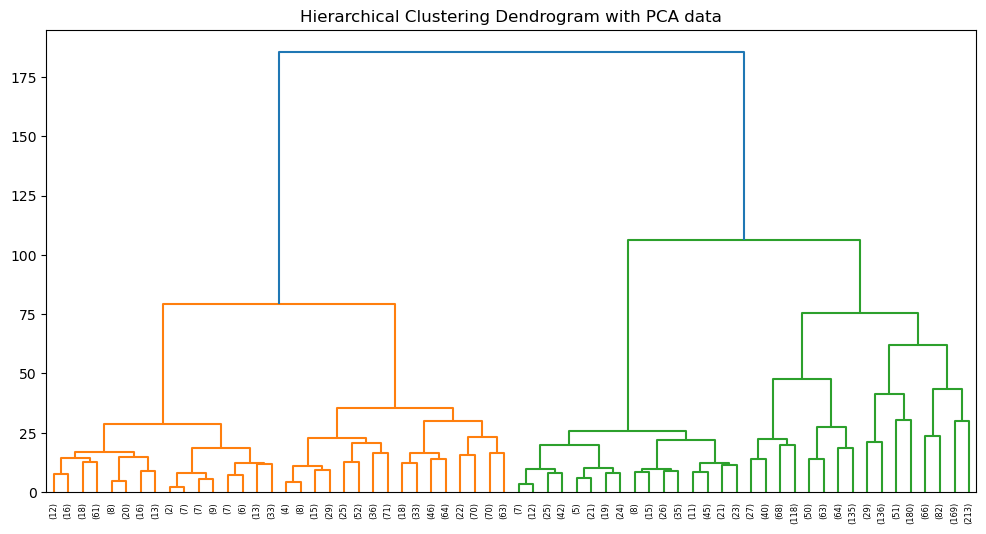

In [70]:
# deciding no. of clusters using dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(pca_data_95, method='ward')
plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram with PCA data")

In [71]:
# clusters = 2

agg_PCA_2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_agg_2 = agg_PCA_2.fit_predict(pca_data_95)

print("Silhouette Score:", silhouette_score(pca_data_95, labels_agg_2))


Silhouette Score: 0.29125886129511885


In [72]:
# clusters = 3

agg_PCA_3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg_3 = agg_PCA_3.fit_predict(pca_data_95)

print("Silhouette Score:", silhouette_score(pca_data_95, labels_agg_3))


Silhouette Score: 0.20852121194607365


In [73]:
# clusters = 4

agg_PCA_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_agg_4 = agg_PCA_4.fit_predict(pca_data_95)

print("Silhouette Score:", silhouette_score(pca_data_95, labels_agg_4))


Silhouette Score: 0.17506449801324117


### DBSCAN - PCA

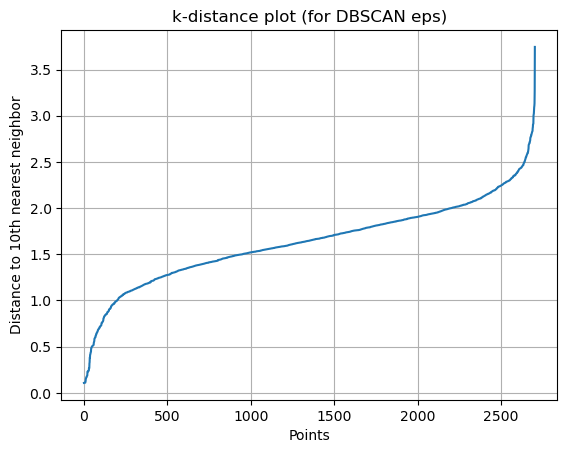

In [74]:
#taking minimum samples as 10
neighbors = NearestNeighbors(n_neighbors = 10)
neighbors_fit = neighbors.fit(pca_data_95)
distances, indices = neighbors_fit.kneighbors(pca_data_95)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.grid(True)
plt.title("k-distance plot (for DBSCAN eps)")
plt.xlabel("Points")
plt.ylabel("Distance to 10th nearest neighbor")
plt.show()

In [75]:
for eps in [2.0, 2.5, 3.0, 3.5, 4.0]:
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels = dbscan.fit_predict(pca_data_95)
    if len(set(labels)) > 1:  # avoid single-cluster case
        score = silhouette_score(pca_data_95, labels)
        print(f"eps={eps}, clusters={len(set(labels))- (1 if -1 in labels else 0)}, silhouette={score:.4f}")

eps=2.0, clusters=9, silhouette=-0.2558
eps=2.5, clusters=2, silhouette=-0.0432


# Evaluation

In [76]:
def evaluate(X, labels, name=""):
    if len(set(labels)) > 1 and -1 not in labels:
        sil = silhouette_score(X, labels)
        db = davies_bouldin_score(X, labels)
        print(f"{name} - Silhouette: {sil:.3f}, DB Index: {db:.3f}")
    else:
        print(f"{name} - Clustering not valid")

evaluate(df_scaled, kmeans_scaled_labels_2, "KMeans - Scaled - k=2")
evaluate(df_scaled, kmeans_scaled_labels_3, "KMeans - Scaled - k=3")
evaluate(df_scaled, kmeans_scaled_labels_4, "KMeans - Scaled - k=4")
evaluate(df_scaled, labels_agg_2, "HAC - Scaled - k=2")
evaluate(df_scaled, labels_agg_3, "HAC - Scaled - k=3")
evaluate(df_scaled, labels_agg_4, "HAC - Scaled - k=4")
evaluate(df_scaled, labels_3, "DBSCAN - Scaled - eps=3 - k=3")
evaluate(pca_data_95, kmeans_pca_labels_2, "KMeans - PCA - k=2")
evaluate(pca_data_95, kmeans_pca_labels_3, "KMeans - PCA - k=3")
evaluate(pca_data_95, kmeans_pca_labels_4, "KMeans - PCA - k=4")
evaluate(pca_data_95, labels_agg_2, "HAC - PCA - k=2")
evaluate(pca_data_95, labels_agg_3, "HAC - PCA - k=3")
evaluate(pca_data_95, labels_agg_4, "HAC - PCA - k=4")



KMeans - Scaled - k=2 - Silhouette: 0.305, DB Index: 1.254
KMeans - Scaled - k=3 - Silhouette: 0.242, DB Index: 1.450
KMeans - Scaled - k=4 - Silhouette: 0.239, DB Index: 1.471
HAC - Scaled - k=2 - Silhouette: 0.280, DB Index: 1.305
HAC - Scaled - k=3 - Silhouette: 0.197, DB Index: 1.381
HAC - Scaled - k=4 - Silhouette: 0.166, DB Index: 1.432
DBSCAN - Scaled - eps=3 - k=3 - Clustering not valid
KMeans - PCA - k=2 - Silhouette: 0.319, DB Index: 1.208
KMeans - PCA - k=3 - Silhouette: 0.256, DB Index: 1.385
KMeans - PCA - k=4 - Silhouette: 0.255, DB Index: 1.399
HAC - PCA - k=2 - Silhouette: 0.291, DB Index: 1.258
HAC - PCA - k=3 - Silhouette: 0.209, DB Index: 1.325
HAC - PCA - k=4 - Silhouette: 0.175, DB Index: 1.368


In [77]:
# Assign Clusters to Developed/Developing
df['Cluster'] = kmeans_pca_labels_2
df['Country'] = countries  # add back country names

developed_cluster = df.groupby('Cluster')['GDP'].mean().idxmax()
df['Development_Status'] = df['Cluster'].apply(lambda x: 'Developed' if x == developed_cluster else 'Developing')


In [78]:
# Cluster Summary
df_result = df.copy()
df_result["Cluster_KMeans"] = kmeans_pca_labels_2
print(df_result.groupby("Cluster_KMeans").mean(numeric_only=True))
print(df_result['Cluster_KMeans'].value_counts())


                Birth Rate  CO2 Emissions  Days to Start Business  \
Cluster_KMeans                                                      
0                 0.032615       7.821376                3.539741   
1                 0.015169       9.992813                3.122550   

                Energy Usage        GDP  Health Exp % GDP  Health Exp/Capita  \
Cluster_KMeans                                                                 
0                   8.841305  22.185236          0.057164           3.954212   
1                   9.938402  24.626408          0.064635           6.245893   

                Infant Mortality Rate  Internet Usage  Lending Interest  ...  \
Cluster_KMeans                                                           ...   
0                            0.055923        0.037918          0.155758  ...   
1                            0.013344        0.292077          0.106211  ...   

                Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
Clus

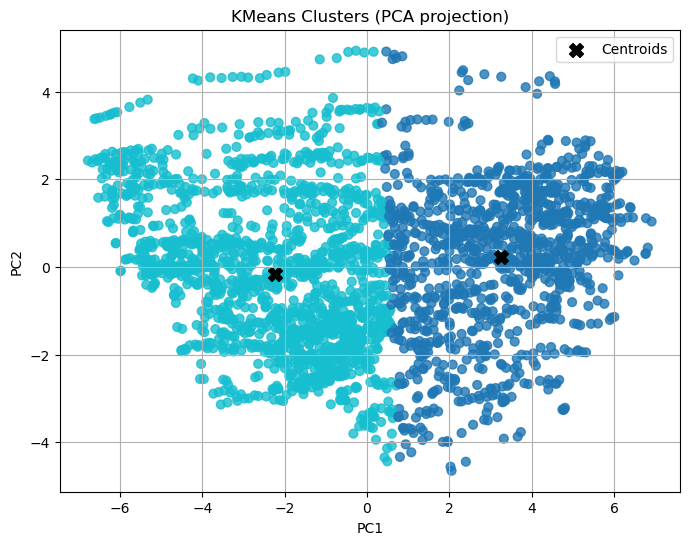

In [79]:
# PCA Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(pca_data_95[:,0], pca_data_95[:,1], c=kmeans_pca_labels_2, cmap='tab10', s=40, alpha=0.8)
centroids = kmeans_pca_2.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='X', s=100, label='Centroids')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters (PCA projection)")
plt.grid(True)
plt.legend()
plt.show()

In [80]:
# Save Models for App

import pickle

import pickle

# Save Scaler transformer
pickle.dump(scaler, open("Scaler.pkl", "wb"))

# Save PCA transformer 
pickle.dump(pca_95, open("PCA_transform.pkl", "wb"))

# Save KMeans model
pickle.dump(kmeans_pca_2, open("Clustering_2.pkl", "wb"))
pickle.dump(kmeans_pca_3, open("Clustering_3.pkl", "wb"))




In [81]:
# checking Country status
def classify_country(country_name):
    if country_name not in df['Country'].values:
        return f"{country_name} not found."
    
    row = df[df['Country'] == country_name].iloc[0]
    return {
        "Country": row['Country'],
        "Status": row['Development_Status'],
        "Cluster": row['Cluster'],
        "GDP": row['GDP'],
        "Birth Rate": row['Birth Rate'],
        "Life Expectancy Male": row['Life Expectancy Male'],
        "Internet Usage": row['Internet Usage'],
        "Total Population": row['Population Total']
    }

# Example usage
print(classify_country("India"))
print(classify_country("United States"))

{'Country': 'India', 'Status': 'Developing', 'Cluster': 0, 'GDP': 26.889962596070145, 'Birth Rate': 0.025667746748577788, 'Life Expectancy Male': 4.127134385045092, 'Internet Usage': 0.0, 'Total Population': 20.764658956983435}
{'Country': 'United States', 'Status': 'Developed', 'Cluster': 1, 'GDP': 29.96216451083065, 'Birth Rate': 0.013902905168991422, 'Life Expectancy Male': 4.31748811353631, 'Internet Usage': 0.33647223662121295, 'Total Population': 19.4579933921969}


In [82]:
print(classify_country("Burundi"))


{'Country': 'Burundi', 'Status': 'Developing', 'Cluster': 0, 'GDP': 20.584562311300598, 'Birth Rate': 0.04114194333117518, 'Life Expectancy Male': 3.871201010907891, 'Internet Usage': 0.0, 'Total Population': 15.7137729400659}


In [83]:
print(classify_country("United Kingdom"))


{'Country': 'United Kingdom', 'Status': 'Developed', 'Cluster': 1, 'GDP': 28.032229433771054, 'Birth Rate': 0.011928570865273802, 'Life Expectancy Male': 4.330733340286331, 'Internet Usage': 0.262364264467491, 'Total Population': 17.891224560750228}


In [84]:
print(classify_country("Algeria"))


{'Country': 'Algeria', 'Status': 'Developing', 'Cluster': 0, 'GDP': 24.726774608568434, 'Birth Rate': 0.019802627296179712, 'Life Expectancy Male': 4.219507705176107, 'Internet Usage': 0.0, 'Total Population': 17.272440615362438}


In [85]:
print(classify_country("China"))


{'Country': 'China', 'Status': 'Developed', 'Cluster': 1, 'GDP': 27.81207097940154, 'Birth Rate': 0.013902905168991422, 'Life Expectancy Male': 4.276666119016055, 'Internet Usage': 0.0, 'Total Population': 20.956474564796}


In [86]:
print(classify_country("Pakistan"))


{'Country': 'Pakistan', 'Status': 'Developing', 'Cluster': 0, 'GDP': 25.026687141490154, 'Birth Rate': 0.03052920503482287, 'Life Expectancy Male': 4.1588830833596715, 'Internet Usage': 0.09531017980432487, 'Total Population': 18.7841566140766}


In [87]:
print(classify_country("France"))


{'Country': 'France', 'Status': 'Developed', 'Cluster': 1, 'GDP': 27.913440192269597, 'Birth Rate': 0.012916225266546327, 'Life Expectancy Male': 4.330733340286331, 'Internet Usage': 0.09531017980432487, 'Total Population': 17.924925292551816}


In [88]:
# Save the final preprocessed dataframe used for training
df_capped['Country'] = raw_df['Country'] #merging back from original daataset
df_capped.to_csv("cleaned_data.csv", index=False)
